In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataSet = pd.read_csv("Position_Salaries.csv")
X = dataSet.iloc[:, 1:2].values
y = dataSet.iloc[:, 2].values

In [5]:
dataSet.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [26]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Text(0, 0.5, 'Salary')

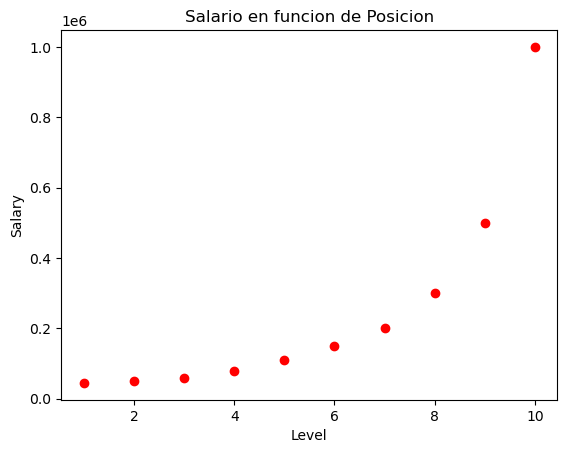

In [27]:
plt.scatter(X, y, color = "red")
plt.title("Salario en funcion de Posicion")
plt.xlabel("Level")
plt.ylabel("Salary")

In [21]:
#Ajustar el modelo de RLS con el Data Set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [28]:
from IPython.display import Markdown, display

b0 = lin_reg.intercept_
b1 = lin_reg.coef_[0]

display(Markdown(f"**y = {b0:.4f} + {b1:.4f}·x**"))

**y = -195333.3333 + 80878.7879·x**

In [32]:
#Ajustar el modelo de RLP con el Data Set
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

In [33]:
from IPython.display import Markdown, display
b0 = lin_reg2.intercept_
coefs = lin_reg2.coef_
equation = f"y = {b0:.4f}"

for i, coef in enumerate(coefs[1:], start=1):
    equation += f" + {coef:.4f}·x^{i}"

display(Markdown(f"**{equation}**"))

**y = 184166.6667 + -211002.3310·x^1 + 94765.4429·x^2 + -15463.2867·x^3 + 890.1515·x^4**

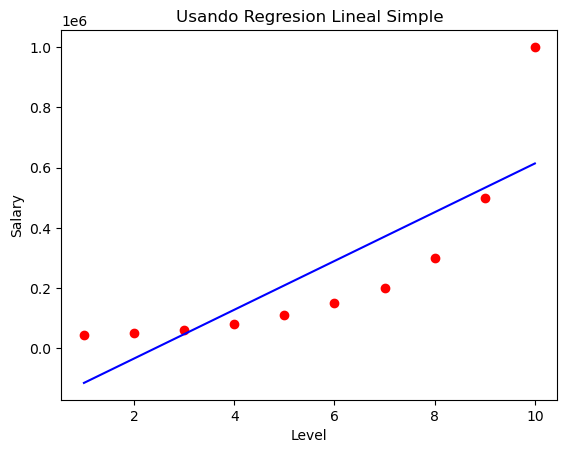

In [40]:
#Visualización de resultados de RLS
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Usando Regresion Lineal Simple")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

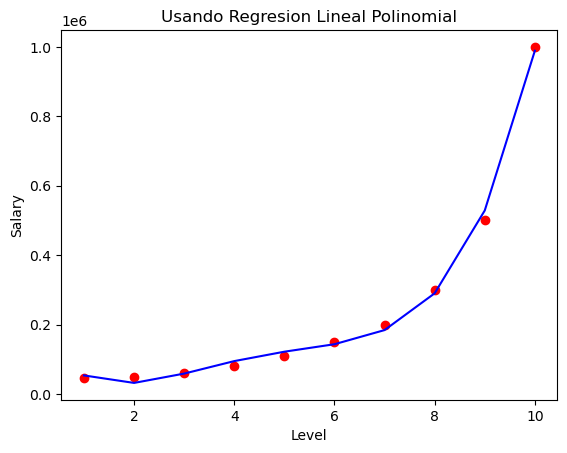

In [41]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg2.predict(X_poly), color = "blue")
plt.title("Usando Regresion Lineal Polinomial")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()